In [1]:
# Obtaining the efficient frontier

In [3]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
%matplotlib inline  #facilitates plotting matplotlib graphs just below code cells and storing them
                    # in the notebook document

In [11]:
assets = ['PG', '^DJI']
pf_data = pd.DataFrame()

for a in assets:
    pf_data[a]= wb.DataReader(a, data_source = 'yahoo', start = '2010-1-1')['Adj Close']

In [12]:
pf_data.tail()

,PG,^DJI
Date,,
2019-05-13,106.110001,25324.990234
2019-05-14,105.599998,25532.050781
2019-05-15,106.699997,25648.019531
2019-05-16,108.110001,25862.679688
2019-05-17,107.449997,25764.000000


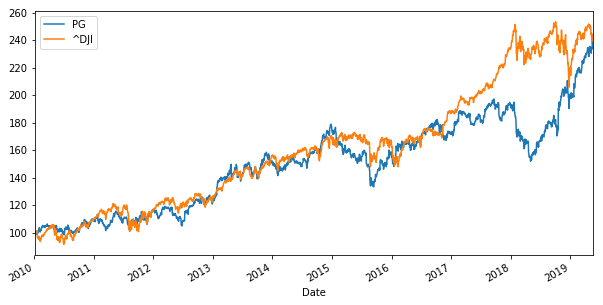

In [13]:
# Normalize to 100
(pf_data/pf_data.iloc[0]*100).plot(figsize=(10,5))

In [15]:
# if we want to obtain an efficient frontier, we will need the log returns
log_returns = np.log(pf_data/pf_data.shift(1))

In [18]:
# annualized avg
log_returns.mean() * 250

PG      0.091827
^DJI    0.094321
dtype: float64

In [20]:
# annualized cov
log_returns.cov() * 250

,PG,^DJI
PG,0.021229,0.011512
^DJI,0.011512,0.020007


In [21]:
#corr
log_returns.corr()

,PG,^DJI
PG,1.000000,0.558596
^DJI,0.558596,1.000000


In [23]:
# number of assets (length of out "assets" list)
num_assets = len(assets)
num_assets

2

In [34]:
# random weights for both (2) securities
arr = np.random.random(2)
print (arr)
print (arr[0]+arr[1]) #This will NOT always = 1 as it should; we will fix that

[0.37063233 0.54207443]
0.9127067622489385


In [49]:
# Let's fix it:
    # x /= 3
    # equivalent to
        # x = x / 3
weights = np.random.random(2)
weights /= np.sum(weights)
print (weights)
print (weights[0] + weights[1]) #Now this is always equal to 1

[0.64084076 0.35915924]
1.0


In [51]:
# Expected Portfolio Return
np.sum(weights * log_returns.mean())* 250

0.09272261485673056

In [52]:
# Expected Portfolio Variance
np.dot(weights.T, np.dot(log_returns.cov()*250,weights))

0.01659854508295144

In [59]:
# Expected Portfolio Volatility (np.sqrt because we want std.dev)
np.sqrt(np.dot(weights.T,np.dot(log_returns.cov()*250,weights)))

0.12883534097036978

In [54]:
# We are not considering 1,000 different investments
# We are considering 1,000 COMBINATIONS of the same assets
# We will be optimizing the weights of each security
# Follow below...

In [65]:
pfolio_returns = [] #start empty. We expect to fill this with randomly generated expected returns
pfolio_volatilities = []

for x in range (1000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    pfolio_returns.append(np.sum(weights*log_returns.mean()*250))
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T,np.dot(log_returns.cov()*250, weights))))
                          
pfolio_returns, pfolio_volatilities

([0.09331064562831734,
  0.09201582419339065,
  0.09353889451705151,
  0.0932930104272367,
  0.09277072922705204,
  0.09323152535837365,
  0.09242385421124588,
  0.09308543250458529,
  0.09271336745755752,
  0.09315907715241992,
  0.092545870466168,
  0.09308504395995962,
  0.09328086951029137,
  0.09287811736364868,
  0.09230166831968864,
  0.09406486258544847,
  0.09308493963043818,
  0.09330378695470844,
  0.09236582085051896,
  0.09281284802296721,
  0.09380897756233783,
  0.09297138912776565,
  0.09343260695217438,
  0.09419636626601598,
  0.09372911979183682,
  0.09295454219808211,
  0.09373727633775691,
  0.09324299224308477,
  0.09309276018396997,
  0.09273106510794278,
  0.09428464831900692,
  0.09427564455869739,
  0.09319854079613943,
  0.09278219459777061,
  0.09369259261929408,
  0.09349183773881324,
  0.09400391945602574,
  0.09362214468038128,
  0.09335044566466222,
  0.09365123888649822,
  0.09423784523632786,
  0.0921725710937684,
  0.09267940683464727,
  0.09254740061

In [92]:
# Same as above but we add a crucial step for plotting the efficient frontier

pfolio_returns = [] 
pfolio_volatilities = []

for x in range (1000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    pfolio_returns.append(np.sum(weights*log_returns.mean()*250))
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T,np.dot(log_returns.cov()*250, weights))))
    
# CRUCIAL STEP (in the results we have two arrays)
pfolio_returns = np.array(pfolio_returns)
pfolio_volatilities = np.array(pfolio_volatilities)

pfolio_returns, pfolio_volatilities

(array([0.0931036 , 0.09335459, 0.0932958 , 0.09325787, 0.09290731,
        0.09245019, 0.09240111, 0.09282891, 0.09225242, 0.09219545,
        0.09348458, 0.09332378, 0.09402095, 0.09373582, 0.09214304,
        0.09398005, 0.09290091, 0.09414265, 0.09398945, 0.09231171,
        0.09306913, 0.09344972, 0.0927312 , 0.09400453, 0.09257971,
        0.0926401 , 0.09287867, 0.09258629, 0.09331016, 0.0940725 ,
        0.09245505, 0.09303253, 0.09286161, 0.0920042 , 0.09236547,
        0.09211845, 0.09286493, 0.09242464, 0.09301932, 0.09232685,
        0.0929461 , 0.09321532, 0.09263682, 0.09371485, 0.09388191,
        0.09380467, 0.09371366, 0.0922179 , 0.09331566, 0.09196775,
        0.09297138, 0.09430304, 0.09297938, 0.09261951, 0.09330121,
        0.09245802, 0.09304912, 0.09349794, 0.0929554 , 0.09363054,
        0.09342888, 0.09293405, 0.0934043 , 0.09275384, 0.09287977,
        0.09346739, 0.09364604, 0.09229002, 0.09236947, 0.09315667,
        0.09285098, 0.0922273 , 0.09277903, 0.09

In [ ]:
# Let's plot:

In [93]:
# First we create a dataframe object containing two columns
portfolios = pd.DataFrame({'Return':pfolio_returns, 'Volatility':pfolio_volatilities})

Text(0, 0.5, 'Expected Return')

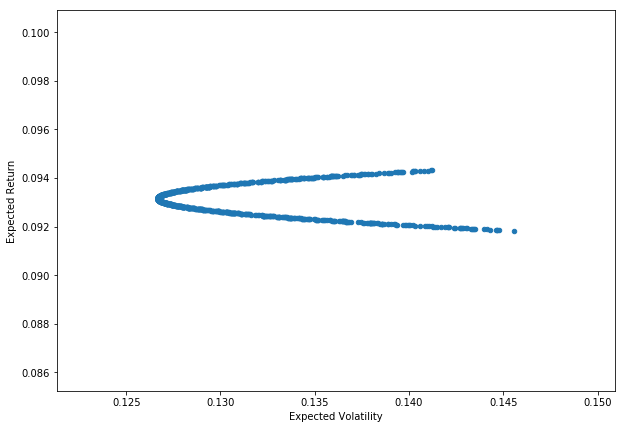

In [96]:
portfolios.plot(x = 'Volatility', y = 'Return', kind = 'scatter', figsize = (10,7));
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')

# Question: Why does my graph look like it is upside down?
# There seems to be more inefficient combinations